In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import pandas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# ***Conclusion On below Analysis***

1. Dataset contains people having an experience level of SE(senior engineer).
2. Majority of people working in this sector are FT(Full Time).
3. Job Titles vary accordingly with company but the most common title was Security Engineer (28%).
4. Mean Analysis of salary in USD in different country shows that the people in the US earn more mean USD followed by isreal, switzerland, Australia , great Britan (this analysis may vary accordingly eith foreign exchange rates and etc..)
5. Deep Analysis on salary in the US was performed and show that the mean salry in USD is 125 K and maximun of600 K. There were ceratin outliers in the dataset which is common as people with more experience and skills have higher salary in this industry. 
6. USA, Great Britan has both the higehest employee residence and the compnay locations present.
7. Majority of the people work remotely (62%).
8. Majority of companies are large based companies (63%).

# **Basic Info on the dataset**
******

In [4]:
data = pd.read_csv("salaries_cyber.csv")


In [5]:
data.shape

(1247, 11)

In [6]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1247.000000,1.247000e+03,1247.000000,1247.000000
mean,2021.316760,5.608525e+05,120278.218925,71.491580
std,0.715501,1.415944e+07,70291.394942,39.346851
min,2020.000000,1.740000e+03,2000.000000,0.000000
25%,2021.000000,7.975450e+04,74594.500000,50.000000
50%,2021.000000,1.200000e+05,110000.000000,100.000000
75%,2022.000000,1.600800e+05,150000.000000,100.000000
max,2022.000000,5.000000e+08,910991.000000,100.000000


In [7]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M
3,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
4,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1247 non-null   int64 
 1   experience_level    1247 non-null   object
 2   employment_type     1247 non-null   object
 3   job_title           1247 non-null   object
 4   salary              1247 non-null   int64 
 5   salary_currency     1247 non-null   object
 6   salary_in_usd       1247 non-null   int64 
 7   employee_residence  1247 non-null   object
 8   remote_ratio        1247 non-null   int64 
 9   company_location    1247 non-null   object
 10  company_size        1247 non-null   object
dtypes: int64(4), object(7)
memory usage: 107.3+ KB


In [9]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [10]:
data.duplicated().sum()


85

Duplicated rows are present.

In [11]:
data.corr()

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,0.027042,0.184246,0.135720
salary,0.027042,1.000000,-0.033166,0.019112
salary_in_usd,0.184246,-0.033166,1.000000,0.174523
remote_ratio,0.135720,0.019112,0.174523,1.000000


Not a lot can be said from correlation.

# ***Expeience Level***

******

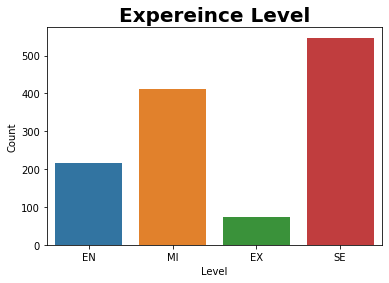

In [12]:
# labels = ['Entry Level','Mid Level','Executive Level','Senior Level']
ax=sns.countplot(x=data['experience_level'])
ax.set_title("Expereince Level",fontsize = 20, fontweight='bold')
ax.set_xlabel("Level")
ax.set_ylabel("Count")
plt.show()


# ***Employment Title***
******

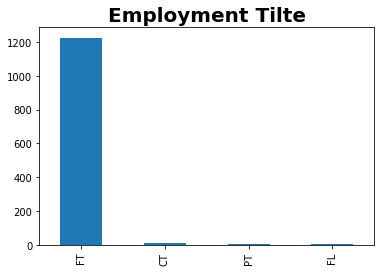

In [13]:
ax=data['employment_type'].value_counts().plot(kind='bar')
ax.set_title("Employment Tilte",fontsize = 20, fontweight='bold')
plt.show()

# **Analysis Of Job Titles**

***I have created a data frame job which consist of the unique job titles along with the count.
Count plot is plotted with accordance to the top 10 rows of this dataframe.
Job titles may vary accordingly according to their respective companies so the analysis may not be perfect !***

******

In [14]:
data1=data.groupby(data['job_title'])['job_title'].count()
job=pd.DataFrame({'job_title':data1.index, 'count':data1.values})
job = job.sort_values(by=['count'], ascending=False).iloc[0:10]
job

,job_title,count
68,Security Engineer,194
14,Cyber Security Analyst,133
57,Penetration Tester,70
46,Information Security Manager,64
17,Cyber Security Engineer,63
65,Security Analyst,47
40,Information Security Analyst,39
19,Cyber Security Specialist,31
22,Cyber Threat Intelligence Analyst,29
64,SOC Analyst,28


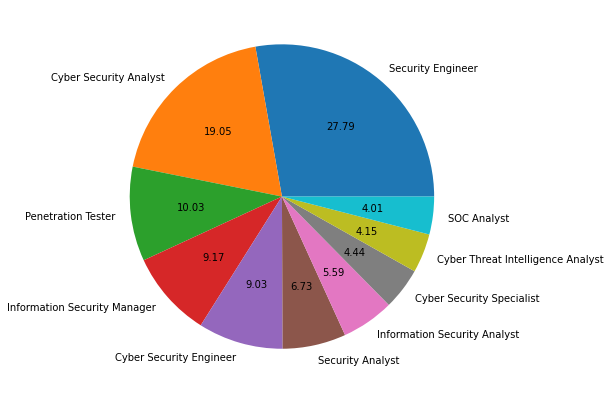

In [15]:
labels=job['job_title']
y=job['count']
fig = plt.figure(figsize =(10, 7))
plt.pie(y,labels=labels,autopct='%.2f')
plt.show()


# **Analysis Of Salary**

***To visualize the salary of every country is difficut...so  i have considered the mean salry in USD of each country in the dataset.
A dataframe salary is created and plotted.***

******

In [16]:
data.iloc[:,4:8]

,salary,salary_currency,salary_in_usd,employee_residence
0,63000,USD,63000,US
1,95000,USD,95000,US
2,70000,USD,70000,US
3,250000,BRL,48853,BR
4,120000,USD,120000,BW
...,...,...,...,...
1242,140000,AUD,96422,AU
1243,60000,GBP,82528,GB
1244,126000,USD,126000,US
1245,42000,GBP,57769,GB


In [17]:
data2 = data.groupby(data['salary_currency'])['salary_in_usd'].mean()
salary = pd.DataFrame({'country':data2.index, 'mean_in_usd':data2.values})
salary=salary.sort_values(by=['mean_in_usd'])
salary

,country,mean_in_usd
15,RUB,2764.000000
18,TWD,11812.000000
10,INR,17838.565217
11,MXN,23001.000000
7,HUF,34018.000000
8,IDR,34432.000000
20,ZAR,39944.666667
1,BRL,46786.416667
17,SGD,49111.500000
16,SEK,52701.000000


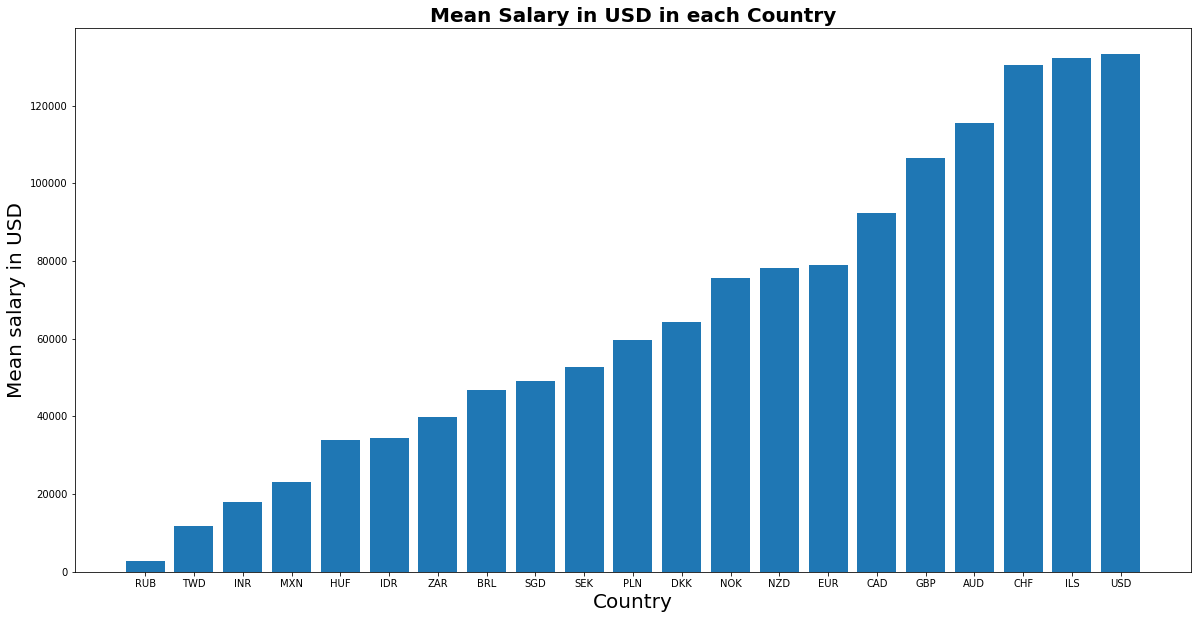

In [18]:
x=salary['country']
y=salary['mean_in_usd']
fig = plt.figure(figsize =(20,10))
plt.bar(x,y)
plt.xlabel("Country",fontsize = 20, )
plt.ylabel("Mean salary in USD",fontsize = 20)
plt.title("Mean Salary in USD in each Country",fontsize = 20, fontweight='bold')
plt.show()


# ***Analysis of Salary In USA***

***It is much better to analyse the salary in a particular country rather than in a group***

******

In [19]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M
3,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
4,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S


In [20]:
us_salary=data[data['salary_currency']=='USD']
us_salary.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,934.000000,934.000000,934.000000,934.000000
mean,2021.390792,133249.092077,133249.092077,72.269807
std,0.699380,64883.596992,64883.596992,39.919372
min,2020.000000,2000.000000,2000.000000,0.000000
25%,2021.000000,90000.000000,90000.000000,50.000000
50%,2022.000000,125000.000000,125000.000000,100.000000
75%,2022.000000,160080.000000,160080.000000,100.000000
max,2022.000000,600000.000000,600000.000000,100.000000


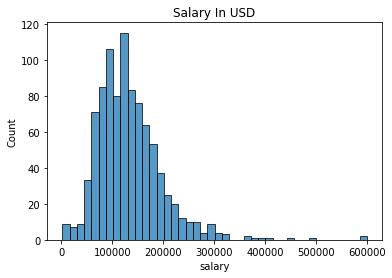

In [21]:
sns.histplot(x=us_salary['salary'])
plt.title("Salary In USD")
plt.show()

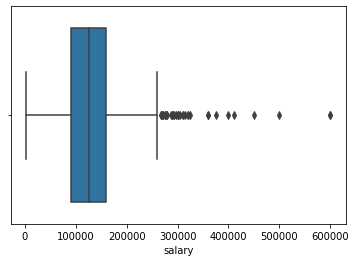

In [22]:
sns.boxplot(x=us_salary['salary'])
plt.show()

# ***Employee Residence***
******

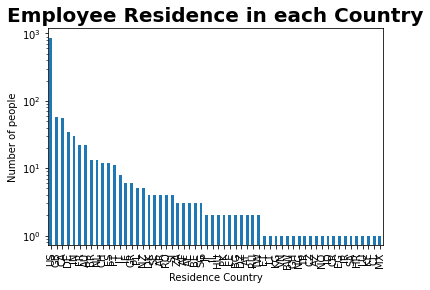

In [23]:
data['employee_residence'].value_counts().plot(kind="bar")
plt.yscale("log")
plt.xlabel("Residence Country",fontsize=10)
plt.ylabel("Number of people",fontsize=10)
plt.title("Employee Residence in each Country",fontsize = 20, fontweight='bold')
plt.show()

# ***Remote Location***
******

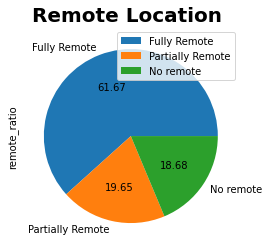

In [24]:
labels=['Fully Remote','Partially Remote','No remote']
data['remote_ratio'].value_counts().plot(kind="pie",labels=labels,autopct="%.2f")
plt.title("Remote Location ",fontsize = 20, fontweight='bold')
plt.legend()
plt.show()

***Most of the people in this sector work remotely***

# ***Compnay Location***
******

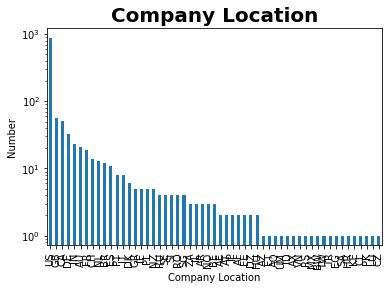

In [25]:
data['company_location'].value_counts().plot(kind="bar")
plt.yscale("log")
plt.xlabel("Company Location",fontsize=10)
plt.ylabel("Number",fontsize=10)
plt.title("Company Location",fontsize = 20, fontweight='bold')
plt.show()

# ***Company Size***
******

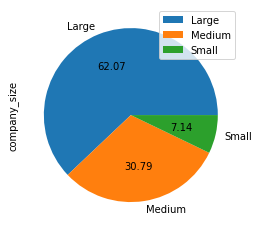

In [26]:
labels=['Large','Medium','Small']
data['company_size'].value_counts().plot(kind="pie",autopct="%.2f",labels=labels)
plt.legend()
plt.show()

# ***Further Analysis***

# **1. Profiles of people who are earning more than 250K in USA**

In [27]:
us250 = us_salary[us_salary['salary'] > 250000]
us250

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
5,2022,EX,FT,Application Security Architect,315000,USD,315000,US,100,US,L
9,2022,EX,FT,Information Security Compliance Manager,360000,USD,360000,TW,100,SG,L
14,2022,EX,FT,Head of Information Security,290000,USD,290000,US,100,US,L
27,2022,EX,FT,Chief Information Security Officer,300000,USD,300000,AE,50,AE,L
85,2022,SE,FT,Detection Engineer,252000,USD,252000,US,100,US,M
105,2022,SE,FT,Vulnerability Management Engineer,250600,USD,250600,US,100,US,M
110,2022,SE,FT,Information Security Officer,267840,USD,267840,US,100,US,M
135,2022,SE,FT,Detection Engineer,292000,USD,292000,GB,100,GB,M
163,2022,SE,FT,Security Engineer,276900,USD,276900,US,100,US,M
292,2022,SE,FT,Information Security Officer,267840,USD,267840,US,100,US,M


<AxesSubplot:ylabel='job_title'>

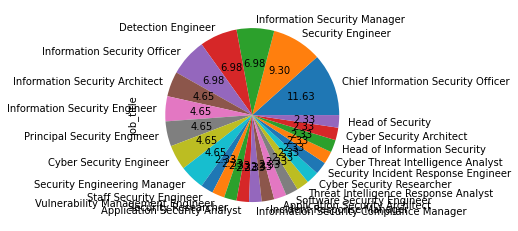

In [29]:
us250['job_title'].value_counts().plot(kind="pie",autopct="%.2f")

***In this dataset there are 42 people earnig more than 250K in USA***
1. Majority are SE, EX.
2. All are FT employees.
3. Majority are remote (>95%)
4. Majority work at large comapnies(>90%).
5. Most frequent tile **Chief Information Security Officer**

# ***Upvote the notebook if you have liked it.. Comments for improvement are much appreciated !***
***Profile*** : [Kaggle](https://www.kaggle.com/ritish1082)
